In [46]:
import matplotlib.pyplot as plt
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

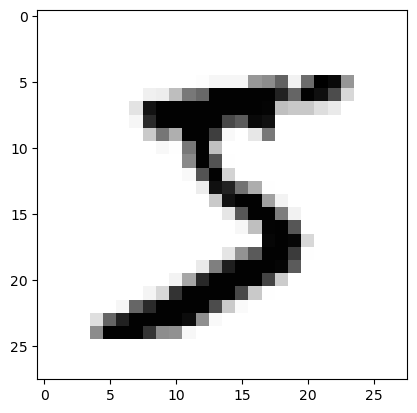

In [47]:
plt.imshow(train_images[0], cmap="Greys")

In [48]:
from tensorflow.keras.utils import to_categorical
# 데이터 전처리
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [50]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
# CNN 모델 정의
# 입력 레이어 정의
inputs = Input(shape=(28, 28, 1))

# 첫 번째 Conv2D + MaxPooling2D 레이어
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 두 번째 Conv2D + MaxPooling2D 레이어
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten 레이어
x = Flatten()(x)

# Dense 레이어 + Dropout
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)


In [51]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# 모델 훈련
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# 모델 평가
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10


300/300 - 16s - loss: 4.0606 - accuracy: 0.7733 - val_loss: 0.6458 - val_accuracy: 0.8301 - 16s/epoch - 54ms/step
Epoch 2/10
300/300 - 18s - loss: 0.9674 - accuracy: 0.7366 - val_loss: 0.5039 - val_accuracy: 0.8769 - 18s/epoch - 59ms/step
Epoch 3/10
300/300 - 18s - loss: 0.7889 - accuracy: 0.7861 - val_loss: 0.3961 - val_accuracy: 0.9225 - 18s/epoch - 60ms/step
Epoch 4/10
300/300 - 16s - loss: 0.6434 - accuracy: 0.8148 - val_loss: 0.3524 - val_accuracy: 0.9308 - 16s/epoch - 52ms/step
Epoch 5/10
300/300 - 17s - loss: 0.6076 - accuracy: 0.8303 - val_loss: 0.3066 - val_accuracy: 0.9303 - 17s/epoch - 56ms/step
Epoch 6/10
300/300 - 16s - loss: 0.5217 - accuracy: 0.8508 - val_loss: 0.3629 - val_accuracy: 0.9325 - 16s/epoch - 53ms/step
Epoch 7/10
300/300 - 18s - loss: 0.4829 - accuracy: 0.8569 - val_loss: 0.2765 - val_accuracy: 0.9442 - 18s/epoch - 59ms/step
Epoch 8/10
300/300 - 17s - loss: 0.4758 - accuracy: 0.8663 - val_loss: 0.2594 - val_accuracy: 0.9432 - 17s/epoch - 56ms/step
Epoch 9/10


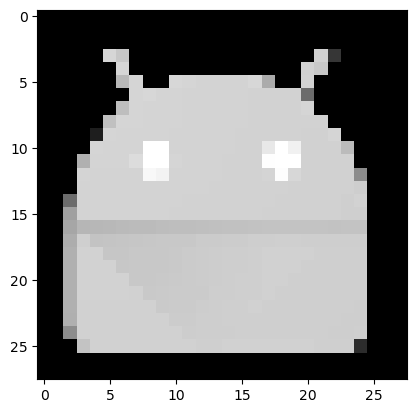

In [44]:
import cv2 as cv

image = cv.imread('../data/android.png',cv.IMREAD_GRAYSCALE)
image = cv.resize(image,(28,28))
image = image.astype('float32')
image = image.reshape(1,784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28,28),cmap='Greys')
plt.show()

In [45]:
pred = model.predict(image.reshape(1,784),batch_size=1)
print("추정된 숫자=", pred.argmax())

ValueError: in user code:

    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(1, 784)
